# FIS Project 1 
 Lesly Perlaza - 441675

### __MSR decompression__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import conjugate_gradient, make_system, msr_to_matrix

The matrix 1 is symmetric.
The matrix 2 is symmetric.


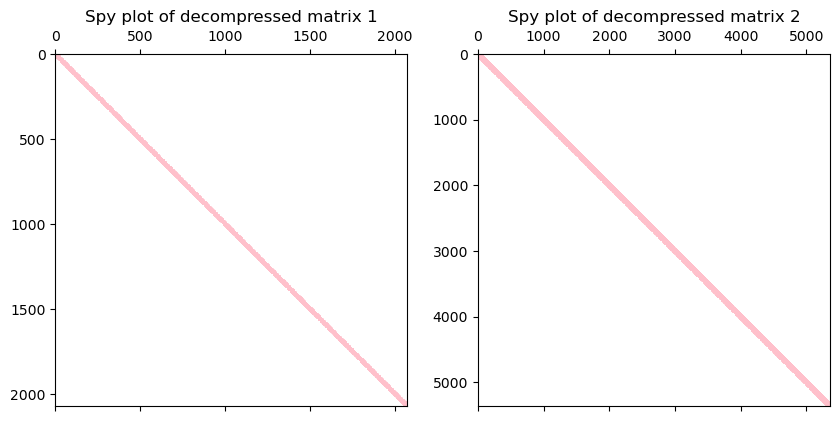

In [3]:
filename = "Data_P1/cg_matrix_msr_1.txt";filename2 = "Data_P1/cg_matrix_msr_2.txt" #Testing MSR format
decompressed_matrix= msr_to_matrix(filename); decompressed_matrix2= msr_to_matrix(filename2)
u = 1
plt.figure(figsize=(10, 10))
for matrix in [decompressed_matrix, decompressed_matrix2]:  # check if the matrix is symmetric
    if np.allclose(matrix, matrix.T):
        print(f"The matrix {u} is symmetric.")
    plt.subplot(1, 2, u)
    plt.spy(matrix, markersize=1, color='pink')
    plt.title(f"Spy plot of decompressed matrix {u}")
    u += 1


### __CG implementation__

In [4]:
A,b,x_true,x0 = make_system(decompressed_matrix) # 1. Create the system of equations
x_approx, residuals, e_A_norms = conjugate_gradient(decompressed_matrix, b, x0, x_true) # 2. Run CG method

In [5]:
A2,b2,x_true2,x02 = make_system(decompressed_matrix2) # 1. Create the system of equations
x_approx2, residuals2, e_A_norms2 = conjugate_gradient(decompressed_matrix2, b2, x02, x_true2) # 2. Run CG method

 MATRIX 1: 
 Shape of Matrix A: (2073, 2073)
Number of iterations: 2074
Final residual norm: 1651.569174038211
Final A-norm error: 12.089633780678195
Final solution x: [1.00000141 1.0843761  1.22963985 ... 1.0008632  0.99435947 0.00126121] 
 
 MATRIX 2: 
Shape of Matrix A: (5364, 5364)
Number of iterations: 5365
Final residual norm: 352.0230480421034
Final A-norm error: 0.6312185155647686
Final solution x: [0.9999872  1.00004719 1.00001545 ... 0.99886273 0.99940757 1.00013499]


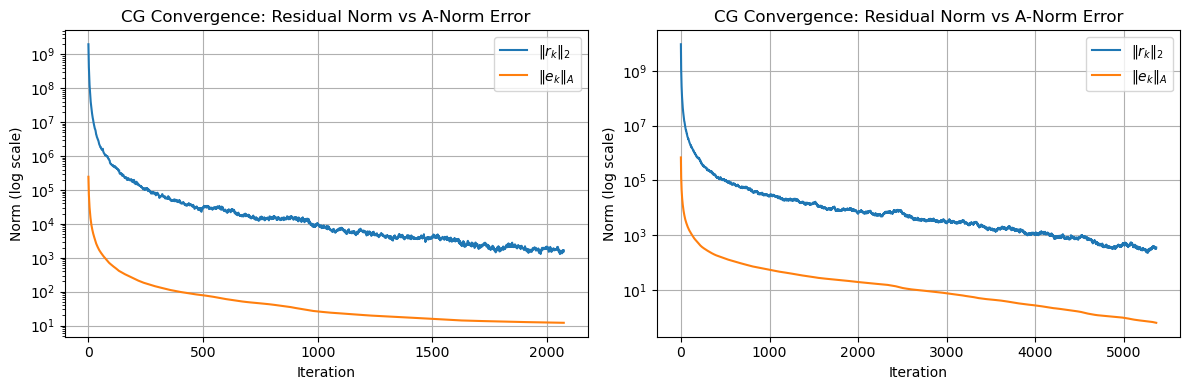

In [6]:
# Plotting and printing results
print(f" MATRIX 1: \n Shape of Matrix A: {decompressed_matrix.shape}"),print(f"Number of iterations: {len(residuals)}"),print(f"Final residual norm: {residuals[-1]}")
print(f"Final A-norm error: {e_A_norms[-1]}"),print(f"Final solution x: {x_approx} \n ")


print(f" MATRIX 2: \nShape of Matrix A: {decompressed_matrix2.shape}")
print(f"Number of iterations: {len(residuals2)}")
print(f"Final residual norm: {residuals2[-1]}")
print(f"Final A-norm error: {e_A_norms2[-1]}")
print(f"Final solution x: {x_approx2}")

u = 1
plt.figure(figsize=(12, 4))
for res in [residuals, residuals2]:  # check if the matrix is symmetric
    plt.subplot(1, 2, u)
    plt.semilogy(res, label=r'$\|r_k\|_2$')
    plt.xlabel('Iteration'), plt.ylabel('Norm (log scale)'), plt.title('CG Convergence: Residual Norm vs A-Norm Error')
    plt.legend(), plt.grid(True), plt.tight_layout()
    u += 1
u = 1
for Ares in [e_A_norms, e_A_norms2]:
    plt.subplot(1, 2, u)
    plt.semilogy(Ares, label=r'$\|e_k\|_A$')
    plt.xlabel('Iteration'), plt.ylabel('Norm (log scale)'), plt.title('CG Convergence: Residual Norm vs A-Norm Error')
    plt.legend(), plt.grid(True), plt.tight_layout()
    u += 1


### __GMRES__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import gmres_2
filename = "Data_P1/gmres_matrix_msr_1.txt"

* _Gmres without preconditioning_

In [26]:
x, residuals, x_axis = gmres_2(filename, relative_residual=1e-8,k_dim=1, max_iterations=600, precon_method="identity")

KeyboardInterrupt: 

runtime: 66m48s

* _Gmres with Jacobi preconditioning_

In [2]:
x_j, residuals_j, x_axis_j = gmres_2(filename, relative_residual=1e-8,k_dim=1, max_iterations=600, precon_method="jacobi")

* _Gmres with Gauss-Seidl preconditioning_

In [3]:
x_g, residuals_g, x_axis_g = gmres_2(filename, relative_residual=1e-8,k_dim=1, max_iterations=600, precon_method="gauss")

* _Gmres with ILU(0) preconditioning_

In [4]:
x_i, residuals_i, x_axis_i = gmres_2(filename, relative_residual=1e-8,k_dim=1, max_iterations=600, precon_method="ilu")

__Plotting:__

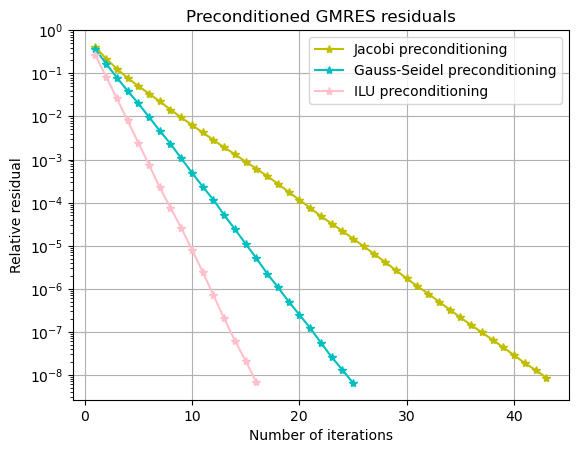

43
25
16


(None, None, None)

In [7]:
plt.title("Preconditioned GMRES residuals")
plt.xlabel("Number of iterations")
plt.ylabel("Relative residual")

plt.semilogy(x_axis_j, residuals_j,  '*-', color='y', label="Jacobi preconditioning")
plt.semilogy(x_axis_g, residuals_g, '*-', color='c', label="Gauss-Seidel preconditioning")
plt.semilogy(x_axis_i, residuals_i, '*-', color='pink', label="ILU preconditioning")

plt.legend()
plt.grid()
plt.show()

#plt.title("GMRES residual")
#plt.xlabel("Number of iterations")
#plt.ylabel("Relative residual")
#plt.semilogy(x_axis, residuals, color='b', label="No preconditioning")
#plt.legend()
#plt.grid()
#plt.show()

print(len(residuals_j)),print(len(residuals_g)),print(len(residuals_i))
#print(len(residuals))

__GMRES with__ $m=10$

In [ ]:
x_10, residuals_10, x_axis_10 = gmres_2(filename, relative_residual=1e-8,k_dim=10, max_iterations=600, precon_method="identity")

runtime: 9m 57.7s

__GMRES with__ $m=50$ 

In [ ]:
x_50, residuals_50, x_axis_50 = gmres_2(filename, relative_residual=1e-8,k_dim=50, max_iterations=600, precon_method="identity")

__GMRES with__ $m=200$ 

In [ ]:
x_200, residuals_200, x_axis_200 = gmres_2(filename, relative_residual=1e-8,k_dim=200, max_iterations=600, precon_method="identity")

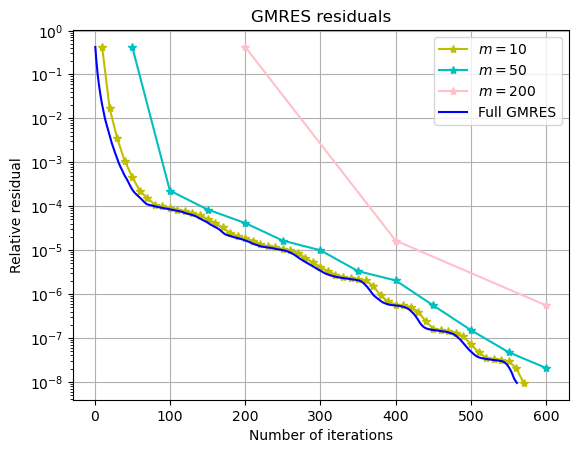

In [ ]:
plt.title("GMRES residuals")
plt.xlabel("Number of iterations")
plt.ylabel("Relative residual")

plt.semilogy(x_axis_10, residuals_10,  '*-', color='y', label="$m=10$")
plt.semilogy(x_axis_50, residuals_50, '*-', color='c', label="$m=50$")
plt.semilogy(x_axis_200, residuals_200, '*-', color='pink', label="$m=200$")
plt.semilogy(x_axis, residuals, color='b', label="Full GMRES")

plt.legend()
plt.grid()
plt.show()